In [120]:
import gzip
import gensim 
import logging
import numpy as np
import csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
from keras.layers import Dropout

noRelation = ['I','my','me','you','your','she','her','his','he','him','we','our','us','they','their','them','it',
              'its','is','are','the','this','these','of','in','into','on','and','or','while','for','with','w','Democrates',
              'democrates','will','do','nothing','did','which','be','are','were','was','is','am','that','there','here',
              'where','dont','a','an','https','election','whitch','hunt','should','oval','paris','Paris','lies','lie',
              'evening','patric','patriots','40','5','etc','minnesota','Minnesota','city','crowd','michigan','Michigan'
              ,'two']

def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with gzip.open (input_file, 'rb') as f:
        for i, line in enumerate (f): 

            if (i%1000==0):
               logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess (line)

def removeNoRelation(list):
    for i in range(len(list)):
        for j in range(len(noRelation)):
            while noRelation[j] in list[i]:
                list[i].remove(noRelation[j])
    return list  
############ Train Word2Vec Model ############################################################################

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
data_file="selectedTweets.csv.gz"         

documents = list (read_input (data_file))
documents = removeNoRelation(documents)    # remove the unrelated word
"""
for element in documents:
    print(element)
"""
# read the tokenized reviews into a list
# each review item becomes a serries of words
# so this becomes a list of lists
logging.info ("Done reading data file")
model = gensim.models.Word2Vec (documents, size=150, window=10, min_count=2, workers=10)
model.train(documents,total_examples=len(documents),epochs=10)


############ Test Word2Vec Model ############################################################################

x = list(read_input("test.csv.gz"))
testDoc = removeNoRelation(x) # remove the word which may not effect the expression of a sentence
errorDict=[]
score = [] # the word's vector score

# modeling each word in each tweet to catch the error #
for i in range(len(testDoc)):
    a = testDoc[i]
    tmp = 0
    for j in range(len(a)):
        try:
            s = (sum(model[a[j]]))
            tmp = tmp + s
        except:
            errorDict.append(a[j])
    if j!=0:
        score.append(tmp/j)
    else:
        print(j)
        
# generating a csv file named "score" to store the word2vec score  
with open("score.csv", 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    for element in score:
        writer.writerow([element])

print("==================")

#print the words which can not be modeled by word2vec
for element in errorDict:
    print(element)








2019-12-22 23:35:45,166 : INFO : reading file selectedTweets.csv.gz...this may take a while
2019-12-22 23:35:45,169 : INFO : read 0 reviews
2019-12-22 23:35:45,261 : INFO : read 1000 reviews
2019-12-22 23:35:45,390 : INFO : Done reading data file
2019-12-22 23:35:45,391 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-12-22 23:35:45,392 : INFO : collecting all words and their counts
2019-12-22 23:35:45,394 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-12-22 23:35:45,413 : INFO : collected 5023 word types from a corpus of 28745 raw words and 1321 sentences
2019-12-22 23:35:45,415 : INFO : Loading a fresh vocabulary
2019-12-22 23:35:45,433 : INFO : effective_min_count=2 retains 2574 unique words (51% of original 5023, drops 2449)
2019-12-22 23:35:45,434 : INFO : effective_min_count=2 leaves 26296 word corpus (91% of original 28745, drops 2449)
2019-12-22 23:35:45,460 : INFO : deleting the raw counts dictionary of 50

2019-12-22 23:35:46,836 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-12-22 23:35:46,855 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-12-22 23:35:46,861 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-12-22 23:35:46,863 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-12-22 23:35:46,876 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-12-22 23:35:46,878 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-12-22 23:35:46,880 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-22 23:35:46,882 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-22 23:35:46,886 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-22 23:35:46,899 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-22 23:35:46,903 : INFO : EPOCH - 2 : training on 28745 raw words (23082 effective 

2019-12-22 23:35:47,603 : INFO : EPOCH - 9 : training on 28745 raw words (23017 effective words) took 0.1s, 261442 effective words/s
2019-12-22 23:35:47,634 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-12-22 23:35:47,653 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-12-22 23:35:47,662 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-12-22 23:35:47,670 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-12-22 23:35:47,674 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-12-22 23:35:47,679 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-12-22 23:35:47,686 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-22 23:35:47,697 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-22 23:35:47,701 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-22 23:35:47,711 : INFO : worker thread f

0
impeaching
above
delivering
substantial
xe
xe
resilience
confronted
renegotiated
costing
xe
presidencies
falling
earnings
rising
heartland
revived
xe
chere
brexit
resistance
managed
rt
cjtruth
swing
inquiry
dominates
independents
co
jeiue
ucrp
presidencies
falling
earnings
rising
heartland
revived
co
vmh
ipkw
decimated
districts
literally
screaming
faces
shifty
xe
teeth
falling
mouth
xe
co
rx
pcyofip
rt
repmarkmeadows
nit
ano
xe
xa
co
nwaeag
exu
rt
replouiegohmert
xe
cthis
xe
xa
witnesses
xe
xa
rt
replouiegohmert
xe
ci
xe
ve
xe
xe
xa
xe
cthis
outrages
xe
overall
xe
foxnewpolls
weighted
xe
cthe
xe
charliekirk
xe
cthere
bribery
alleged
articles
xe
judgejeanine
repmikejohnson
xe
admitting
xe
handed
consequences
unlawful
conduct
jail
apologies
xe
ccan
referring
xe
xe
ccountry
xe
xe
cu
xe
continuation
magakag
horowitz
guilt
exposed
horowitz
couldn
xe
rt
kimstrassel
depth
explanation
abuses
detailed
abuses
pick
bestsel
xe
xa
co
kxyac
ldwv
rt
brithume
thread
illustrating
denial
dishonesty
c

stevescalise
nhe
pages
xe
xe
xe
xa
rt
gopleader
devised
timeline
impeaching
ve
filling
xe
xa
rt
repandybiggsaz
xe
cto
summarize
realdonaldtrump
frustrated
inability
xe
xa
rt
repandybiggsaz
individuals
ncomes
sequel
ndemocrats
wil
xe
xa
rt
judgejeanine
caucus
repandybiggsaz
replouiegohmert
discuss
latest
xe
xa
rt
repleezeldin
stubborn
xe
fairy
tale
highlights
key
zelensky
xe
kno
xe
xa
rt
repmattgaetz
repzoelofgren
fascist
repjerrynadler
ripping
asunder
xe
xa
rt
usnavy
update
usnavy
releases
names
sailors
naspcola
profoundly
grieve
xe
xa
rt
clewandowski_
realdonaldtrump
cong
xe
xa
rt
clewandowski_
fundamental
latest
op
ed
published
hill
co
gsjuhg
pk
rt
gopchairwoman
realdonaldtrump
simply
xe
nall
xe
xa
politician
co
ulzjy
mjw
rt
wsj
wsjopinion
sink
xe
confirmation
cries
davidrivkin
le
xe
xa
rt
davidrivkin
xe
turns
ward
legislature
branch
righ
xe
xa
rt
howappealing
xe
cthis
subverts
constitution
xe
nakedly
procedurally
defective
xe
pub
xe
xa
rt
davidrivkin
anonymity
protected
retaliation


[1 0 1 0 1 0 1 0 0 1 0 1 2 0 1 2 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1
 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0]
[[34 12  0]
 [10 22  0]
 [13  5  2]]


              precision    recall  f1-score   support

           0       0.60      0.74      0.66        46
           1       0.56      0.69      0.62        32
           2       1.00      0.10      0.18        20

    accuracy                           0.59        98
   macro avg       0.72      0.51      0.49        98
weighted avg       0.67      0.59      0.55        98



Text(0, 0.5, 'Error Score')

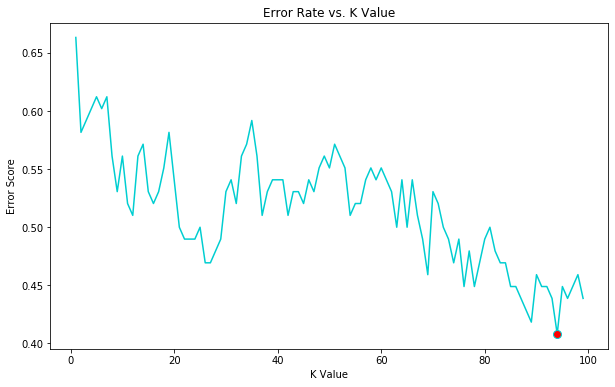

In [121]:
import numpy as np 
from sklearn import neighbors 
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

############ Train KNN Model With Ternary output############################################################################

df = pd.read_csv('test_labeled2.csv')
df.head()
#print(df)
scaler = StandardScaler()

scaler.fit(df.drop('stock_var',axis=1)) #delete the variable we wwant to predict
scaled_features = scaler.transform(df.drop('stock_var',axis=1))

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

x = df_feat
y = df['stock_var']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=31)

#k=94, random_stat = 31
knn = KNeighborsClassifier(n_neighbors=94)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print(pred)
# using confusion matrix
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

error_rate =[]
"""  # find out the best "k" and random_stat
for i in range(1,200):
  for j in range(1,200):  
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=j)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    if np.mean(pred_i != y_test)<=0.30: print(i,j,np.mean(pred_i != y_test))
    error_rate.append(np.mean(pred_i != y_test))
"""
error_rate2=[]
 # fixed "random_stat" value to plot the error rate diagram
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=31)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate2.append(np.mean(pred_i != y_test))

#plotting the diagram
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate2,color='darkturquoise', linestyle='solid', marker='o',
         markerfacecolor='red',markevery=[93],markersize=8) #k=94 is stored in [93] because markvery's index begin from 0
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Score')

#print(knn.score(x_test, y_test))

2019-12-22 18:06:15,058 : INFO : reading file selectedTweets.csv.gz...this may take a while
2019-12-22 18:06:15,060 : INFO : read 0 reviews
2019-12-22 18:06:15,176 : INFO : read 1000 reviews
2019-12-22 18:06:15,319 : INFO : Done reading data file
2019-12-22 18:06:15,321 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-12-22 18:06:15,323 : INFO : collecting all words and their counts
2019-12-22 18:06:15,326 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-12-22 18:06:15,344 : INFO : collected 5027 word types from a corpus of 27253 raw words and 1321 sentences
2019-12-22 18:06:15,345 : INFO : Loading a fresh vocabulary
2019-12-22 18:06:15,364 : INFO : effective_min_count=2 retains 2578 unique words (51% of original 5027, drops 2449)
2019-12-22 18:06:15,366 : INFO : effective_min_count=2 leaves 24804 word corpus (91% of original 27253, drops 2449)
2019-12-22 18:06:15,391 : INFO : deleting the raw counts dictionary of 50

2019-12-22 18:06:17,126 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-12-22 18:06:17,152 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-12-22 18:06:17,155 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-12-22 18:06:17,156 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-12-22 18:06:17,158 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-12-22 18:06:17,163 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-12-22 18:06:17,167 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-22 18:06:17,201 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-22 18:06:17,208 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-22 18:06:17,211 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-22 18:06:17,213 : INFO : EPOCH - 2 : training on 27253 raw words (22533 effective 

2019-12-22 18:06:17,912 : INFO : EPOCH - 9 : training on 27253 raw words (22496 effective words) took 0.1s, 291495 effective words/s
2019-12-22 18:06:17,934 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-12-22 18:06:17,951 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-12-22 18:06:17,961 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-12-22 18:06:17,963 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-12-22 18:06:17,974 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-12-22 18:06:17,976 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-12-22 18:06:17,978 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-22 18:06:17,980 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-22 18:06:17,982 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-22 18:06:17,989 : INFO : worker thread f

[[10 22]
 [ 5 61]]


              precision    recall  f1-score   support

           0       0.67      0.31      0.43        32
           1       0.73      0.92      0.82        66

    accuracy                           0.72        98
   macro avg       0.70      0.62      0.62        98
weighted avg       0.71      0.72      0.69        98

58 57 0.29591836734693877
85 121 0.2755102040816326
86 121 0.29591836734693877
87 121 0.2755102040816326
88 121 0.2857142857142857
89 121 0.2755102040816326
90 121 0.2755102040816326
91 119 0.2857142857142857
92 149 0.29591836734693877
94 121 0.29591836734693877
94 149 0.29591836734693877
94 152 0.29591836734693877
95 121 0.29591836734693877
96 121 0.29591836734693877
100 121 0.29591836734693877
106 74 0.29591836734693877
107 74 0.29591836734693877
143 74 0.29591836734693877
146 74 0.29591836734693877
147 74 0.2755102040816326
149 74 0.2857142857142857
151 74 0.29591836734693877
154 74 0.29591836734693877
155 74 0.2857142857142857
156 74 0.2857

Text(0, 0.5, 'Error Score')

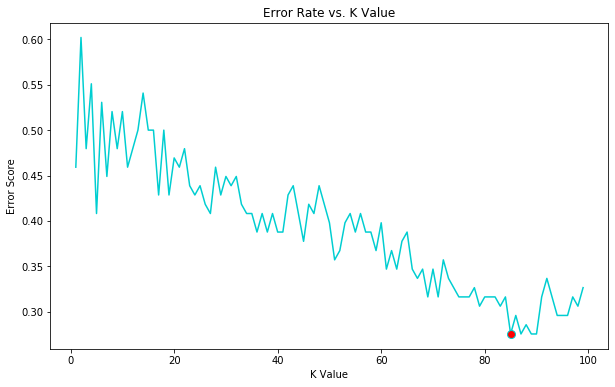

In [122]:
import numpy as np 
from sklearn import neighbors 
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

############ Train KNN Model With Binary output ############################################################################

df = pd.read_csv('2test_labeled2.csv')
df.head()

scaler = StandardScaler()

scaler.fit(df.drop('stock_var',axis=1)) #delete the variable we wwant to predict
scaled_features = scaler.transform(df.drop('stock_var',axis=1))

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

x = df_feat
y = df['stock_var']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=121)

#k=85, random_stat = 121
knn = KNeighborsClassifier(n_neighbors=85)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)


#using confusion matrix
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

# find out the best "k" and random_stat
error_rate = []

# finding out the  the best "k" and random_stat
# this cost a lot of time 
for i in range(1,200):
  for j in range(1,200):  
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=j)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    if np.mean(pred_i != y_test)<=0.30: print(i,j,np.mean(pred_i != y_test))
    precision_rate.append(1-np.mean(pred_i != y_test))
    
    
error_rate2=[]

 # fixed "random_stat" value to plot the error rate diagram
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=121)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate2.append(np.mean(pred_i != y_test))

#plotting the diagram
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate2,color='darkturquoise', linestyle='solid', marker='o',
         markerfacecolor='red',markevery=[84],markersize=8) #k=85 is stored in [84] because markvery's index begin from 0
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Score')

#print(knn.score(x_test, y_test))